# Transformacion de variables para conseguir una relacion no lineal

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('./datasets/auto/auto-mpg.csv')
data.shape

(406, 9)

In [5]:
%matplotlib inline

Text(0.5, 1.0, 'HP vs. MPG')

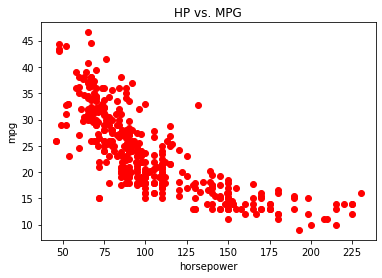

In [6]:
data.mpg = data.mpg.dropna()
data.horsepower = data.horsepower.dropna()
plt.plot(data.horsepower, data.mpg, 'ro')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.title('HP vs. MPG')

# Modelo de regresion lineal

## El modelo sera: $mpg = \alpha + {\beta}*horsepower$

In [10]:
x = data.horsepower.fillna(data.horsepower.mean())
y = data.mpg.fillna(data.horsepower.mean())

In [13]:
lm = LinearRegression()
lm.fit(x[:, np.newaxis], y)

/tmp/ipykernel_3953/2235896066.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lm.fit(x[:, np.newaxis], y)


LinearRegression()

In [14]:
type(x)

pandas.core.series.Series

In [15]:
type(x[:, np.newaxis])

/tmp/ipykernel_3953/2389322685.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  type(x[:, np.newaxis])


numpy.ndarray

In [16]:
%matplotlib inline

/tmp/ipykernel_3953/18744538.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(x, lm.predict(x[:,np.newaxis]), color='blue')


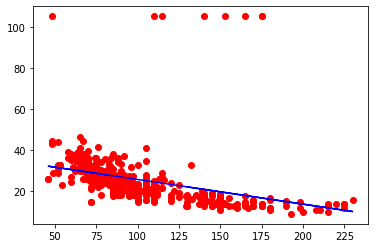

In [18]:
plt.plot(x,y, 'ro')
plt.plot(x, lm.predict(x[:,np.newaxis]), color='blue')

In [19]:
lm.score(x[:,np.newaxis], y)

/tmp/ipykernel_3953/2649026400.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lm.score(x[:,np.newaxis], y)


0.11252845170929782

In [21]:
SSD = np.sum((y - lm.predict(x[:,np.newaxis]))**2)
SSD

/tmp/ipykernel_3953/4139782770.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  SSD = np.sum((y - lm.predict(x[:,np.newaxis]))**2)


67829.79575213075

In [23]:
RSE = np.sqrt(SSD/(len(x[:,np.newaxis])-1))
RSE

/tmp/ipykernel_3953/3228141017.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  RSE = np.sqrt(SSD/(len(x[:,np.newaxis])-1))


12.941444168474975

In [24]:
y_mean = np.mean(y)
error = RSE/y_mean
SSD, RSE, error

(67829.79575213075, 12.941444168474975, 0.5151475011815175)

# Modelo de regresion cuadratico
## El modelo sera: $mpg = \alpha + {\beta}*horsepower^2$

In [25]:
x_data = x**2
x_data = x[:,np.newaxis]

/tmp/ipykernel_3953/1513037869.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_data = x[:,np.newaxis]


In [27]:
lm = LinearRegression()
lm.fit(x_data, y)

LinearRegression()

In [28]:
lm.score(x_data, y)

0.11252845170929782

In [29]:
RSE = np.sqrt(SSD/(len(x)-1))
y_mean = np.mean(y)
error = RSE/y_mean
SSD, RSE, error

(67829.79575213075, 12.941444168474975, 0.5151475011815175)

# Modelo de regresion lineal y cuadratico
## El modelo sera: $mpg = \alpha + {\beta*horsepower} + {\gamma*horsepower^2}$

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [31]:
poly = PolynomialFeatures(degree=2)

In [32]:
x_data = poly.fit_transform(x[:,np.newaxis])

/tmp/ipykernel_3953/3583076827.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_data = poly.fit_transform(x[:,np.newaxis])


In [33]:
lm = linear_model.LinearRegression()

In [34]:
lm.fit(x_data, y)

LinearRegression()

In [35]:
lm.score(x_data, y)

0.1318474991544134

In [36]:
lm.intercept_

52.23193033705104

In [37]:
lm.coef_

array([ 0.        , -0.38378746,  0.0010559 ])

## El modelo sera: $mpg = 52.2319 -0.38378*hp + 0.001055*hp^2$

In [40]:
for d in range(2,6):
    poly  = PolynomialFeatures(degree=d)
    x_data = poly.fit_transform(x[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(x_data, y)
    print(f'Grado de la regresion: {d}')
    print(lm.score(x_data, y))
    print(lm.intercept_)
    print(lm.coef_)

Grado de la regresion: 2
0.1318474991544134
52.23193033705104
[ 0.         -0.38378746  0.0010559 ]
Grado de la regresion: 3
0.1503303467843078
87.09951584316246
[ 0.00000000e+00 -1.33193891e+00  8.91271316e-03 -1.99393204e-05]
Grado de la regresion: 4
0.1503303716304374
86.9924255462705
[ 0.00000000e+00 -1.32791444e+00  8.86015866e-03 -1.96562189e-05
 -5.34420730e-10]
Grado de la regresion: 5
0.15086245083509264
49.96723369414019
[ 0.00000000e+00  4.30828169e-01 -2.24734458e-02  2.42970742e-04
 -1.04113033e-06  1.56726065e-09]


/tmp/ipykernel_3953/2894738313.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_data = poly.fit_transform(x[:,np.newaxis])
/tmp/ipykernel_3953/2894738313.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_data = poly.fit_transform(x[:,np.newaxis])
/tmp/ipykernel_3953/2894738313.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_data = poly.fit_transform(x[:,np.newaxis])
/tmp/ipykernel_3953/2894738313.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before i

## El problema de los outliers: puntos alejados del resto de puntos

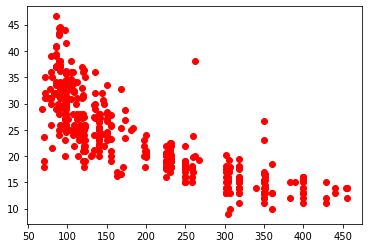

In [42]:
plt.plot(data['displacement'], data['mpg'], 'ro')

In [44]:
x = data.displacement.fillna(data.displacement.mean())
x = x[:,np.newaxis]
y = data.mpg.fillna(data.mpg.mean())
lm = LinearRegression()
lm.fit(x, y)

/tmp/ipykernel_3953/1261062435.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:,np.newaxis]


LinearRegression()

In [45]:
lm.score(x, y)

0.6261049762826918

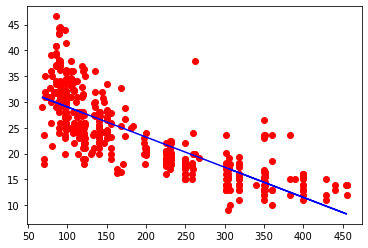

In [46]:
%matplotlib inline
plt.plot(x, y, 'ro')
plt.plot(x, lm.predict(x), color='blue')

In [48]:
data[(data.displacement > 250) & (data.mpg > 20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
307,23.9,8,260.0,90.0,3420,22.2,79,1,oldsmobile cutlass salon brougham
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [49]:
data_clean = data.drop([258, 305, 307, 372, 395])

In [50]:
x = data_clean.displacement.fillna(data_clean.displacement.mean())
x = x[:,np.newaxis]
y = data_clean.mpg.fillna(data_clean.mpg.mean())
lm = LinearRegression()
lm.fit(x, y)

/tmp/ipykernel_3953/1817662845.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:,np.newaxis]


LinearRegression()

In [51]:
lm.score(x, y)

0.6474495118320847

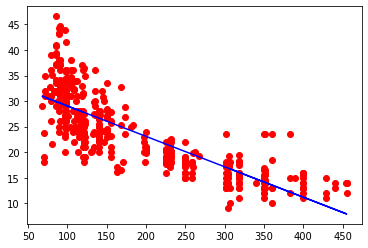

In [52]:
%matplotlib inline
plt.plot(x, y, 'ro')
plt.plot(x, lm.predict(x), color='blue')